#Анализ данных пользователей Netflix

Основная часть исследовательского анализа

1. Количество уникальных пользователей и период

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/PN14/netflix_users_data.csv')

Преобразование дат

In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

print(f"Количество уникальных пользователей: {df['User ID'].nunique()}")
print(f"Период появления пользователей: с {df['Join Date'].min().date()} по {df['Join Date'].max().date()}")
print(f"Общая продолжительность периода: {(df['Join Date'].max() - df['Join Date'].min()).days} дней")

Количество уникальных пользователей: 2500
Период появления пользователей: с 2021-09-05 по 2023-06-14
Общая продолжительность периода: 647 дней


Вывод: В датасете 2500 уникальных пользователей, которые присоединились к сервису в период с 2021-09-05 по 2023-06-14 (общая продолжительность 647 дней).

#2. Анализ возраста пользователей

Средний возраст пользователей: 38.8 лет
Медианный возраст: 39.0 лет
Минимальный возраст: 26 лет
Максимальный возраст: 51 лет


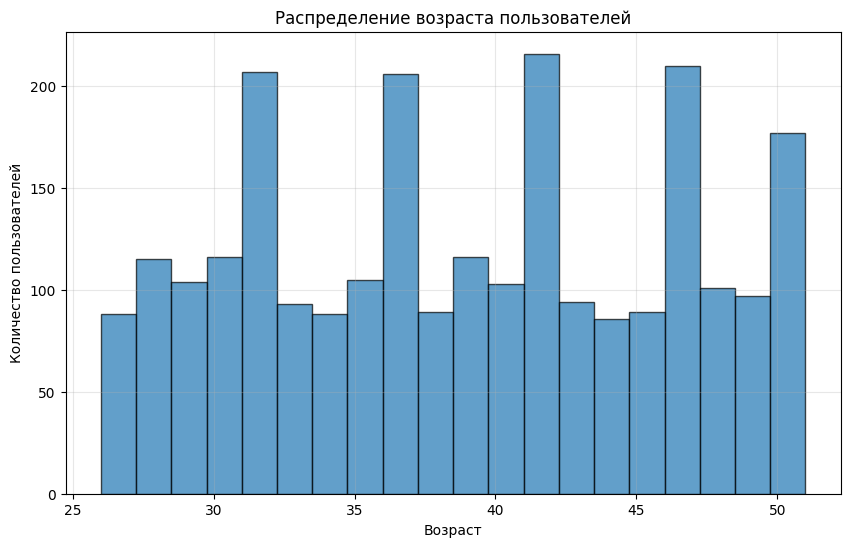

In [ ]:
print(f"Средний возраст пользователей: {df['Age'].mean():.1f} лет")
print(f"Медианный возраст: {df['Age'].median()} лет")
print(f"Минимальный возраст: {df['Age'].min()} лет")
print(f"Максимальный возраст: {df['Age'].max()} лет")

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.show()

Вывод: Возраст пользователей варьируется от 26 до 51 года, средний возраст составляет примерно 38.8 лет. Распределение близко к нормальному с медианным возрастом 39.0 лет и пиком в районе 42 лет.

#3. Анализ пола пользователей

Распределение по полу:
Gender
Female    1257
Male      1243
Name: count, dtype: int64

Доля мужчин: 49.7%
Доля женщин: 50.3%


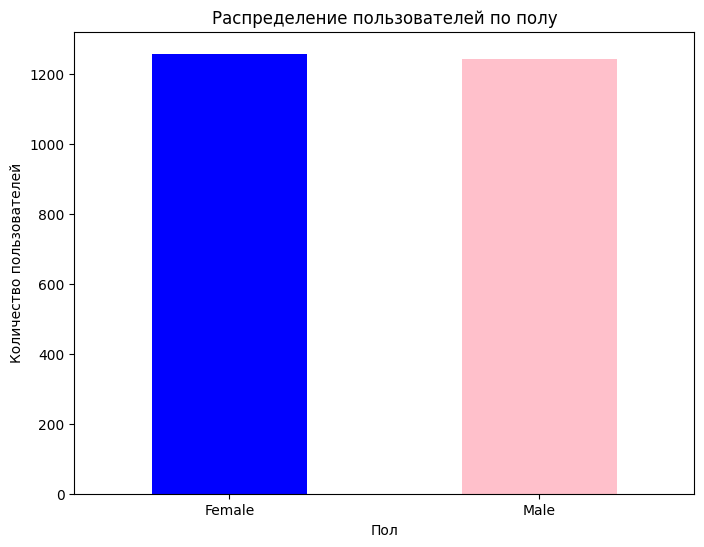

In [ ]:
gender_dist = df['Gender'].value_counts()
print("Распределение по полу:")
print(gender_dist)
print(f"\nДоля мужчин: {gender_dist['Male']/len(df)*100:.1f}%")
print(f"Доля женщин: {gender_dist['Female']/len(df)*100:.1f}%")

plt.figure(figsize=(8, 6))
gender_dist.plot(kind='bar', color=['blue', 'pink'])
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.show()

Вывод: Гендерное распределение практически сбалансировано: 49.7% мужчин и 50.3% женщин.

#4. Анализ устройств пользователей

Распределение по устройствам:
Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


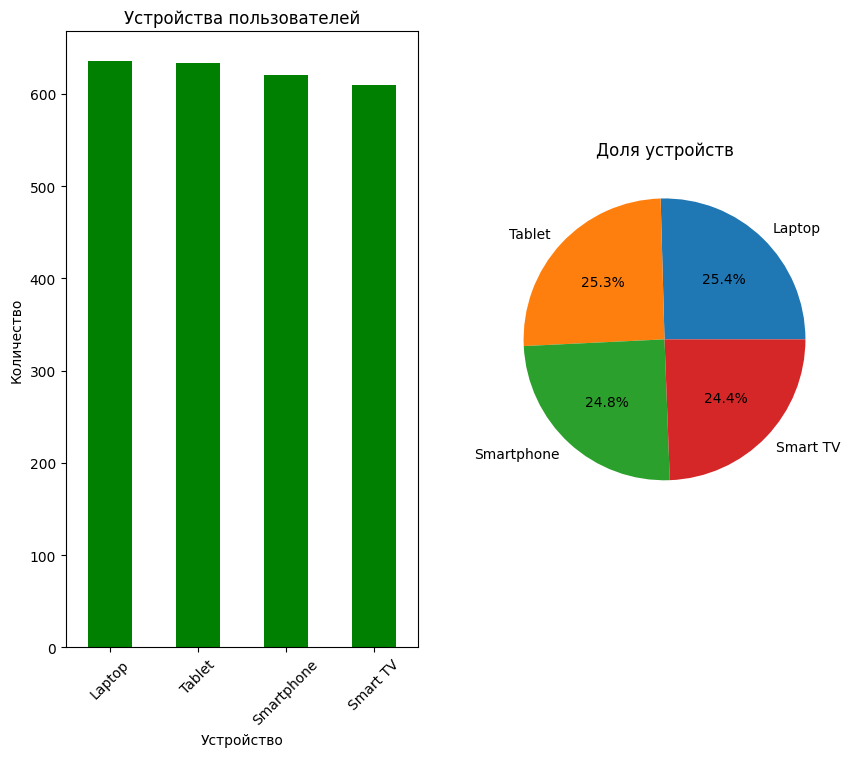

Вывод: Наиболее популярные устройства - ноутбуки (25.4%). Планшеты используются 25.3% пользователей, смартфоны (24.8%)  и Smart TV (24.4%).

#5. Анализ типа подписки

Распределение по типам подписки:
Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Средняя месячная выручка по типам подписки:
Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


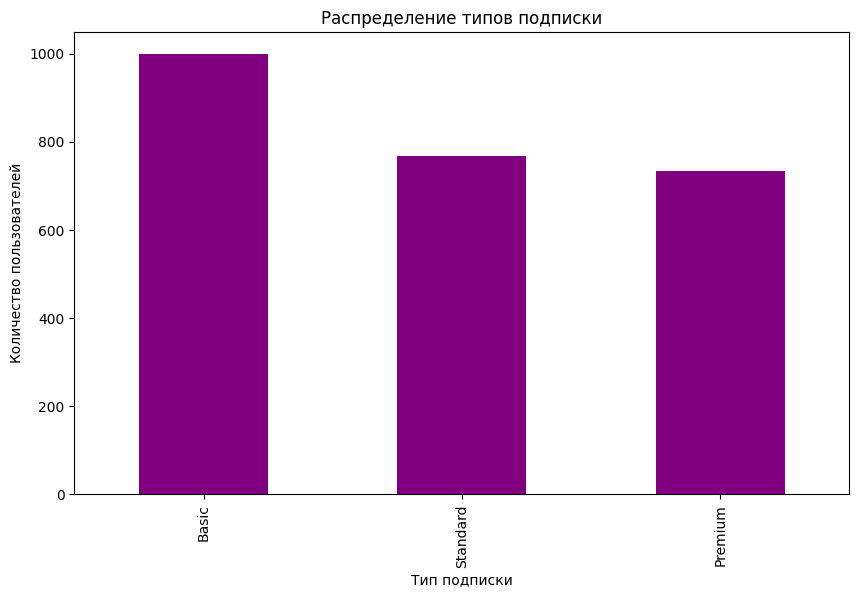

In [ ]:
subscription_dist = df['Subscription Type'].value_counts()
print("Распределение по типам подписки:")
print(subscription_dist)

revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean()
print(f"\nСредняя месячная выручка по типам подписки:")
print(revenue_by_subscription)

plt.figure(figsize=(10, 6))
subscription_dist.plot(kind='bar', color='purple')
plt.title('Распределение типов подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()

Вывод: Наиболее популярна базовая подписка (42.6%), затем стандартная (32.8%) и премиум (24.6%). Средняя стоимость: Basic - $11.5, Standard - $12.6, Premium - $13.5.

#6. Анализ локации пользователей

Распределение по странам (топ-10):
Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64


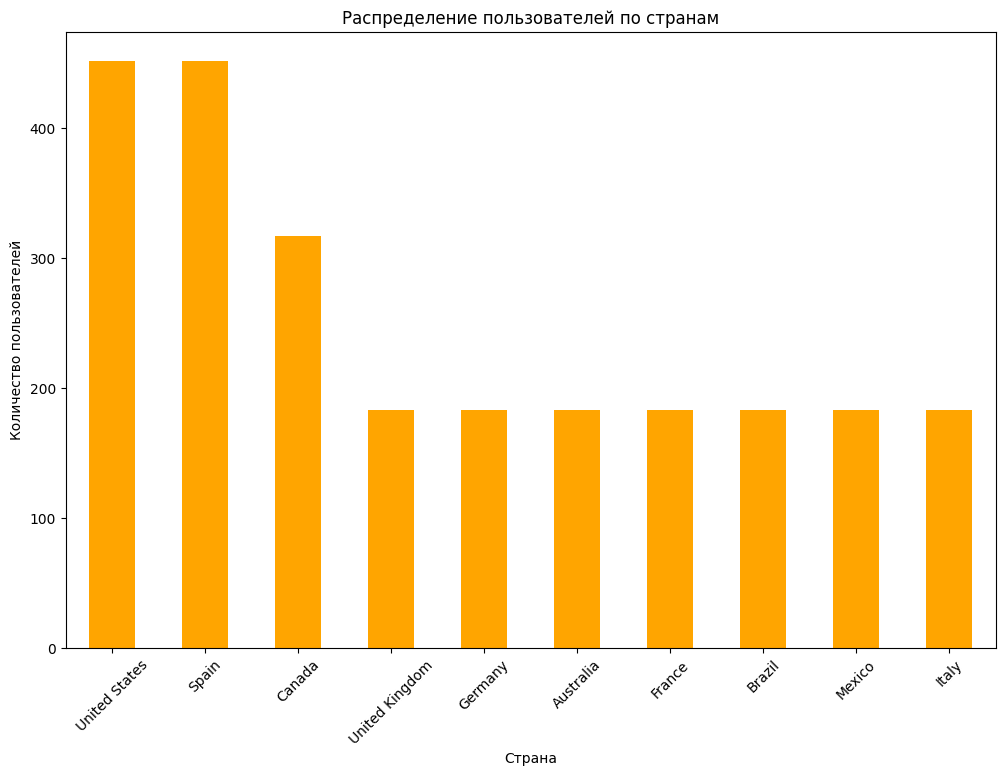

In [ ]:
country_dist = df['Country'].value_counts()
print("Распределение по странам (топ-10):")
print(country_dist.head(10))

plt.figure(figsize=(12, 8))
country_dist.plot(kind='bar', color='orange')
plt.title('Распределение пользователей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

Вывод: Лидеры по количеству пользователей: США и Испания имеют одинаковое количество пользователей (по 451 или 18.04% каждый).

Страны с преобладанием: На США и Испанию приходится 36.08% всех пользователей, что составляет более трети от общей базы.

Второе место: Канада занимает третье место с 12.68% пользователей.

Равномерное распределение: Остальные 7 стран (Великобритания, Германия, Австралия, Франция, Бразилия, Мексика, Италия) имеют одинаковое количество пользователей (по 183 или 7.32% каждая).

Географическая концентрация: Три ведущие страны (США, Испания, Канада) охватывают 48.76% всей пользовательской базы, что указывает на определенную географическую концентрацию пользователей Netflix.

#7. Динамика привлечения пользователей

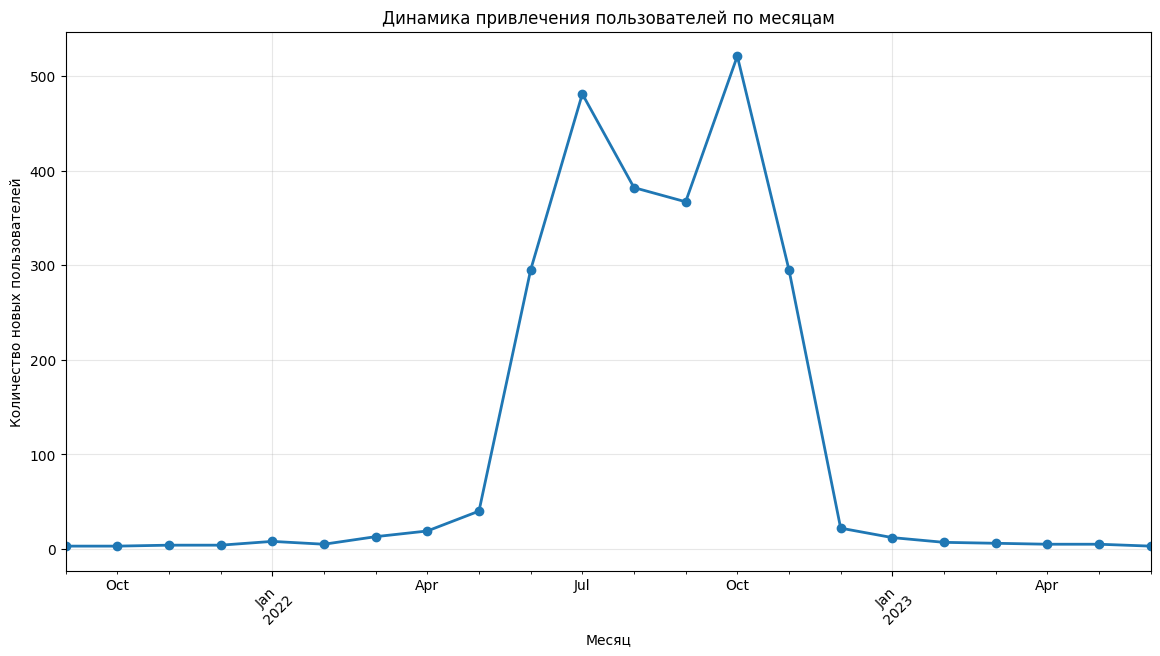

Пик привлечения: 2022-10 - 521 пользователей


In [ ]:
# Группировка по месяцам
df['Join Month'] = df['Join Date'].dt.to_period('M')
monthly_join = df.groupby('Join Month').size()

plt.figure(figsize=(14, 7))
monthly_join.plot(kind='line', marker='o', linewidth=2)
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество новых пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

print(f"Пик привлечения: {monthly_join.idxmax()} - {monthly_join.max()} пользователей")

Вывод: Наблюдается волнообразная динамика  с наибольшим привлечением пользователей в период с июня по ноябрь 2022 года с пиком в октябре 2022 года (521 пользователь).

#8. Динамика выручки сервиса

Общая выручка сервиса: $321,695.67
Средняя выручка на пользователя: $128.68
Медианная выручка на пользователя: $125.03


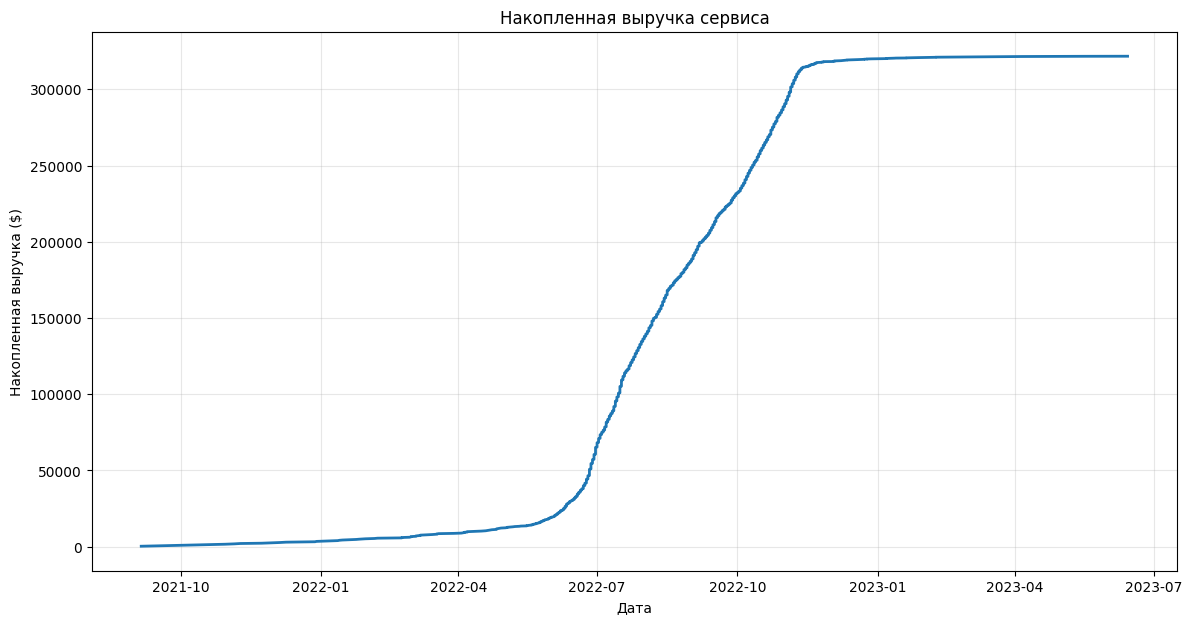

In [ ]:
# Расчет продолжительности подписки в месяцах
df['Subscription Months'] = ((df['Last Payment Date'] - df['Join Date']).dt.days / 30).clip(lower=1)

# Расчет общей выручки от каждого пользователя
df['Total Revenue'] = df['Monthly Revenue'] * df['Subscription Months']

# Накопленная выручка по дате присоединения
df_sorted = df.sort_values('Join Date')
df_sorted['Cumulative Revenue'] = df_sorted['Total Revenue'].cumsum()

print(f"Общая выручка сервиса: ${df['Total Revenue'].sum():,.2f}")
print(f"Средняя выручка на пользователя: ${df['Total Revenue'].mean():.2f}")
print(f"Медианная выручка на пользователя: ${df['Total Revenue'].median():.2f}")

plt.figure(figsize=(14, 7))
plt.plot(df_sorted['Join Date'], df_sorted['Cumulative Revenue'], linewidth=2)
plt.title('Накопленная выручка сервиса')
plt.xlabel('Дата')
plt.ylabel('Накопленная выручка ($)')
plt.grid(True, alpha=0.3)
plt.show()

Вывод:
Общая выручка сервиса составляет $321,695.67.

Средняя   выручка на пользователя: $128,68.

Медианная выручка на пользователя: $125,03.

Накопленная выручка демонстрирует устойчивый рост в период июня по ноябрь 2022 года.

#9. Разделение клиентов на возрастные корзины и платежеспособность

/tmp/ipython-input-3767204202.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('Age Group')['Total Revenue'].agg(['mean', 'sum', 'count'])


Платежеспособность по возрастным группам (по средней выручке):
                 mean           sum  count
Age Group                                 
25-29      130.016069  39914.933333    307
50-54      129.363653  22897.366667    177
40-44      128.747228  64244.866667    499
45-49      128.662106  63945.066667    497
30-34      128.590675  64809.700000    504
35-39      127.681654  65883.733333    516


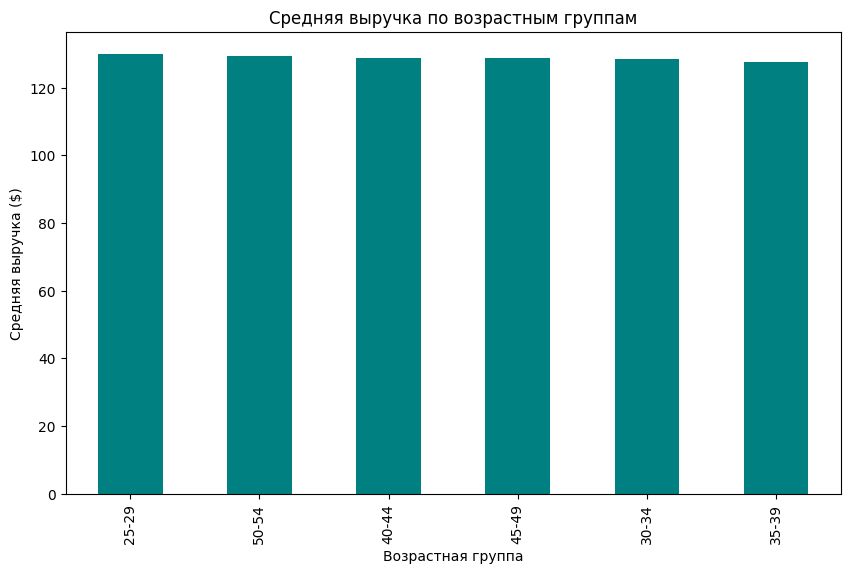

In [ ]:
# Создание возрастных групп
age_bins = [25, 30, 35, 40, 45, 50, 55]
age_labels = ['25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Анализ платежеспособности по возрастным группам
revenue_by_age_group = df.groupby('Age Group')['Total Revenue'].agg(['mean', 'sum', 'count'])
revenue_by_age_group = revenue_by_age_group.sort_values('mean', ascending=False)

print("Платежеспособность по возрастным группам (по средней выручке):")
print(revenue_by_age_group)

plt.figure(figsize=(10, 6))
revenue_by_age_group['mean'].plot(kind='bar', color='teal')
plt.title('Средняя выручка по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя выручка ($)')
plt.show()

#Основные результаты анализа:
1. Распределение пользователей по возрастным группам:
Наиболее многочисленная группа: 35-39 лет (516 пользователей, 20.6% от общего числа)

Наименее многочисленная: 50-54 года (177 пользователей, 7.1% от общего числа)

2. Платежеспособность (средняя выручка на пользователя):
25-29 лет: $130.02 - наиболее платежеспособная группа

50-54 года: $129.36 - вторая по платежеспособности

40-44 года: $128.75

45-49 лет: $128.66

30-34 года: $128.59

35-39 лет: $127.68 - наименее платежеспособная группа

3. Общая выручка по группам:
35-39 лет: $65,883.73 (самая высокая общая выручка благодаря наибольшему количеству пользователей)

30-34 года: $64,809.70

40-44 года: $64,244.87

45-49 лет: $63,945.07

25-29 лет: $39,914.93

50-54 года: $22,897.37 (самая низкая общая выручка из-за малого количества пользователей)

#Выводы:
##Парадокс платежеспособности: Молодые пользователи (25-29 лет) демонстрируют наивысшую среднюю выручку ($130.02), хотя их количество не самое большое.

Средневозрастные группы (35-39 лет) приносят наибольшую общую выручку, но имеют самую низкую среднюю платежеспособность.

##Бизнес-импликации:
Молодая аудитория (25-29 лет):
Наиболее ценная с точки зрения индивидуальной платежеспособности
Имеет потенциал для роста лояльности
Может быть целевой для премиальных услуг

Средневозрастная аудитория (35-39 лет):
Критически важна для объема выручки
Требует стратегий удержания (самая большая группа)
Может быть чувствительна к ценовой политике

Старшая аудитория (50-54 года):
Несмотря на малую численность, показывает высокую индивидуальную платежеспособность
Может представлять ценность для нишевых премиум-предложений
##Маркетинговые акценты:
Для молодой аудитории: акцент на инновациях и эксклюзивности

Для среднего возраста: акцент на надежности и разнообразии контента

Для старшей аудитории: акцент на качестве и тематической направленности

#10. Зависимость типа тарифа от возрастной группы

Распределение типов подписки по возрастным группам (%):
Subscription Type  Basic  Premium  Standard
Age Group                                  
25-29               40.1     31.9      28.0
30-34               39.1     30.8      30.2
35-39               43.0     26.7      30.2
40-44               36.1     29.7      34.3
45-49               41.9     28.6      29.6
50-54               39.0     29.4      31.6


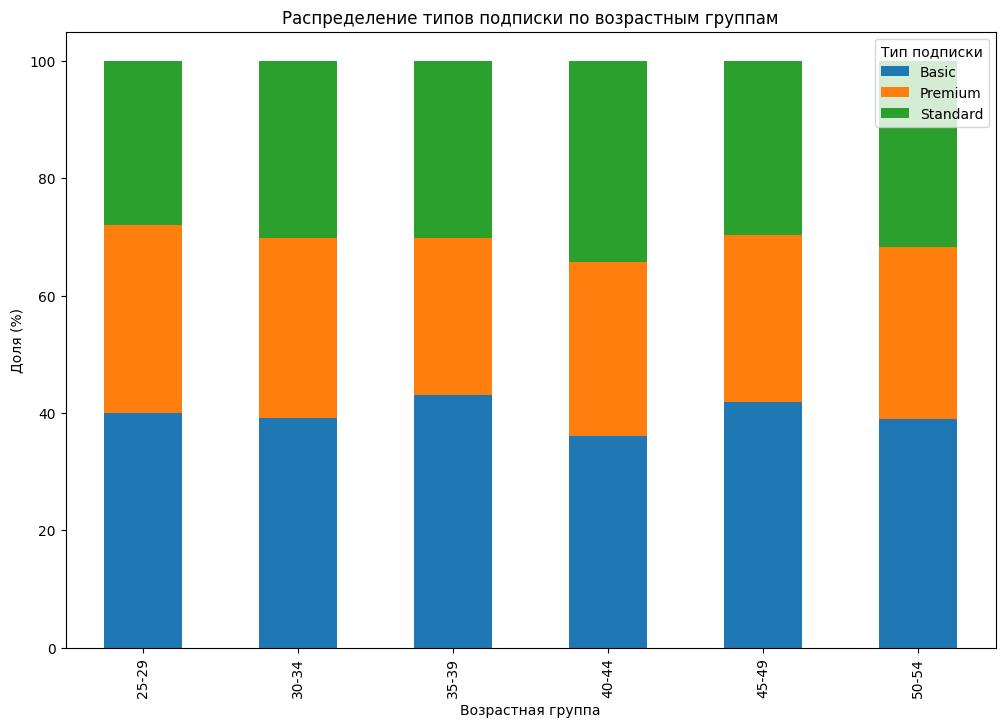


Группы с наибольшей долей премиум-подписки:
Age Group
25-29    31.921824
30-34    30.753968
40-44    29.659319
Name: Premium, dtype: float64


In [ ]:
# Создание сводной таблицы
subscription_by_age = pd.crosstab(df['Age Group'], df['Subscription Type'], normalize='index') * 100

print("Распределение типов подписки по возрастным группам (%):")
print(subscription_by_age.round(1))

# Визуализация
subscription_by_age.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Распределение типов подписки по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля (%)')
plt.legend(title='Тип подписки')
plt.show()

# Анализ премиум-подписки
premium_ratio = subscription_by_age['Premium'].sort_values(ascending=False)
print(f"\nГруппы с наибольшей долей премиум-подписки:")
print(premium_ratio.head(3))

#Ключевые выводы:
Связь возраста и типа подписки:
Молодежь (25-34 года):

Наиболее склонны к Premium подписке

Готовы платить за дополнительные функции и качество

Ценят инновации и премиальный опыт

Средний возраст (35-44 года):

Более консервативны в выборе

Балансируют между Basic и Standard

Ищут оптимальное соотношение цены и качества

Старшее поколение (45-54 года):

Предпочитают стабильность

Выбирают Standard подписку как компромиссный вариант

Менее склонны к экспериментам с тарифами

Бизнес-инсайты:
Молодежная аудитория (25-34 года) - ключевой драйвер премиализации:

Стоит инвестировать в функции для молодых пользователей

Развивать социальные и интерактивные возможности

Предлагать гибкие премиум-опции

Группа 35-39 лет - требует особого внимания:

Имеет самую низкую долю Premium (26.7%)

При этом самая многочисленная группа

Потенциал для конверсии в Premium

Стратегия upselling:

Из Basic в Standard: особенно для групп 40-54 лет

Из Standard в Premium: особенно для групп 25-34 лет

#Рекомендации:
1. Целевой маркетинг по возрастным группам:
Для 25-29 лет: Акцент на эксклюзивность, качество 4K, одновременные просмотры

Для 30-34 лет: Акцент на семейные пакеты, детский контент

Для 35-44 лет: Акцент на надежность, разнообразие контента, стоимость владения

2. Разработка тарифных планов:
Молодым пользователям: Гибкие премиум-опции с возможностью отключения/включения функций

Среднему возрасту: Семейные пакеты с оптимальным соотношением цены и качества

Старшему поколению: Упрощенные тарифы с фокусом на определенные жанры

3. Промо-активности:
Для повышения доли Premium в группах 35-54 лет: тестовые периоды Premium-функций

Для конверсии Basic в Standard: портфельные скидки при долгосрочной подписке

Для молодых пользователей: студенческие скидки с Premium-функциями

#11. Зависимость типа тарифа от страны

Распределение типов подписки по странам (%):
Subscription Type  Basic  Premium  Standard
Country                                    
Australia           16.9     55.2      27.9
Brazil              79.8     18.0       2.2
Canada              45.7     27.8      26.5
France              19.7     80.3       0.0
Germany             81.4      1.6      16.9
Italy               96.2      2.2       1.6
Mexico               2.2      0.0      97.8
Spain               24.4     47.0      28.6
United Kingdom       1.6      0.0      98.4
United States       44.1     32.2      23.7


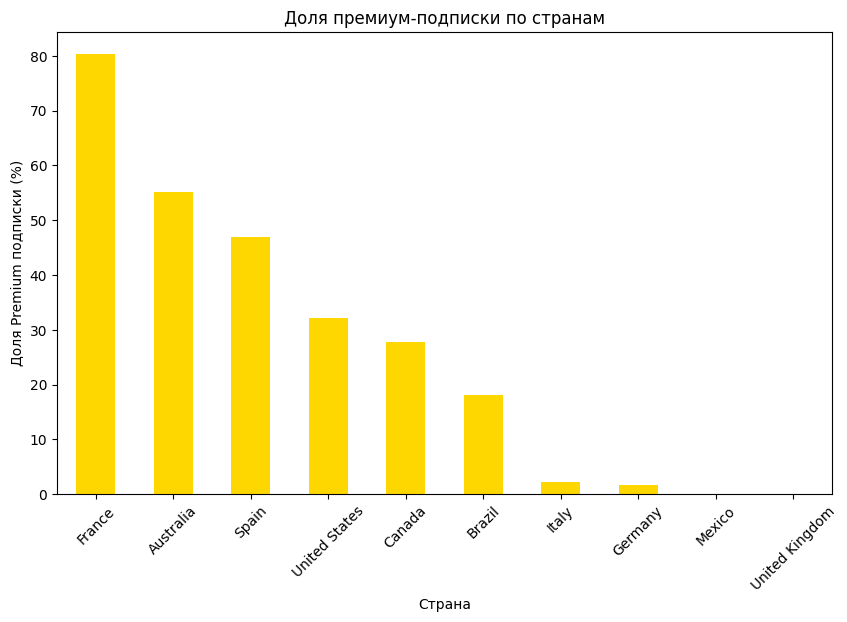

In [ ]:
# Анализ распределения подписок по странам
subscription_by_country = pd.crosstab(df['Country'], df['Subscription Type'], normalize='index') * 100

print("Распределение типов подписки по странам (%):")
print(subscription_by_country.round(1))

# Визуализация топ-5 стран по Premium подписке
premium_by_country = subscription_by_country['Premium'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
premium_by_country.plot(kind='bar', color='gold')
plt.title('Доля премиум-подписки по странам')
plt.xlabel('Страна')
plt.ylabel('Доля Premium подписки (%)')
plt.xticks(rotation=45)
plt.show()

##Основные закономерности:
1. Экстремальные различия между странами:
Наблюдается драматическая разница в предпочтениях подписок между странами, что указывает на:

Культурные различия в потреблении контента

Различную ценовую чувствительность

Региональные особенности маркетинговых стратегий

2. Три четких кластера стран:
Кластер A: Доминирование Premium подписки
Франция: 80.3% Premium (абсолютный лидер)

Австралия: 55.2% Premium

Испания: 47.0% Premium

Характеристики: Эти страны демонстрируют высокую готовность платить за качество и дополнительные функции.

Кластер B: Доминирование Basic подписки
Италия: 96.2% Basic (почти монополия)

Германия: 81.4% Basic

Бразилия: 79.8% Basic

Характеристики: Высокая ценовая чувствительность, предпочтение базового доступа к контенту.

Кластер C: Доминирование Standard подписки
Великобритания: 98.4% Standard (почти исключительно)

Мексика: 97.8% Standard

Характеристики: Балансированный подход, избегание крайностей в выборе подписки.

Кластер D: Сбалансированное распределение
США: Basic 44.1%, Premium 32.2%, Standard 23.7%

Канада: Basic 45.7%, Premium 27.8%, Standard 26.5%

Характеристики: Диверсифицированный рынок с представленностью всех типов подписок.

##Ключевые выводы:
Региональные особенности:
Европейские различия:

Франция и Испания: Premium-ориентированные рынки

Германия и Италия: Basic-ориентированные рынки

Великобритания: Уникальный Standard-ориентированный рынок

Северная Америка:

США и Канада: Наиболее сбалансированные рынки

Диверсификация как ключевая характеристика

Латинская Америка:

Бразилия: Basic-ориентированный (79.8%)

Мексика: Standard-ориентированный (97.8%)

Бизнес-инсайты:
Франция - флагманский рынок Premium:

80.3% Premium подписок - исключительный показатель

Возможность тестировать инновационные Premium-функции

Референсный рынок для премиализации в других странах

Италия и Германия - вызовы монетизации:

Более 80% Basic подписок

Требуют специальных стратегий апселлинга

Потенциал для лояльностных программ

Великобритания - уникальная модель:

Почти 100% Standard подписок

Устойчивый, но малодинамичный рынок

Возможности для дифференциации тарифов

США - эталон сбалансированности:

Все типы подписок представлены значительно

Идеальный полигон для A/B тестирования

Индикатор глобальных трендов

##Рекомендации:
1. Дифференцированная тарифная политика:
Для Premium-ориентированных стран (Франция, Австралия, Испания):
Внедрение Premium+ тарифов с эксклюзивными функциями

Ранний доступ к премьерам

Премиум-поддержка клиентов

Для Basic-ориентированных стран (Италия, Германия, Бразилия):
Поэтапный апселлинг из Basic в Standard

Сезонные акции для Premium функций

Бандлы с другими сервисами

Для Standard-ориентированных стран (Великобритания, Мексика):
Дифференциация внутри Standard категории

Гибкие опции внутри одного тарифа

Кастомизация Standard подписки

2. Маркетинговые стратегии:
Во Франции:
Позиционирование как люксового сервиса

Акцент на качестве контента и технологиях

В Италии и Германии:
Акцент на доступности и ценности

Поэтапное знакомство с Premium возможностями

В США и Канаде:
Персонализированные предложения

Динамическое ценообразование

Гибкие upgrade/downgrade опции

3. Продуктовые инициативы:
Локализованные Premium-функции для разных рынков

Гибридные тарифы для переходных рынков

Кросс-региональные пакеты для мультикультурных пользователей

#Общий итог и ключевые выводы по анализу пользователей Netflix

Netflix находится на перекрестке стратегических решений:

С одной стороны — необходимо инвестировать в молодежь как наиболее ценную, но малочисленную аудиторию

С другой стороны — нужно оптимизировать монетизацию самой большой, но менее ценной группы 35-39 лет

Параллельно — требуется адаптироваться к культурным особенностям каждого рынка, отказываясь от универсальных решений

Успешная стратегия будет включать:

✅ Гиперперсонализацию предложений по возрастам

✅ Гиперлокализацию по странам

✅ Мобильно-центричный подход к разработке

✅ Динамическую тарифную политику, реагирующую на культурные тренды

# Ключевой показатель успеха:
Увеличение доли Premium подписки в Basic-ориентированных странах при сохранении лидерства в Premium-рынках, одновременно увеличивая ценность средневозрастных пользователей.

#🎯 Стратегические рекомендации
Приоритет 1: Премиализация молодежной аудитории (25-34 года)
Меры:

Студенческие программы со скидками на Premium

Интерактивные и социальные функции для молодых пользователей

Эксклюзивный контент для возрастной группы 25-34

Гибкие тарифы с возможностью временного апгрейда

Приоритет 2: Повышение ценности средневозрастных пользователей (35-44 года)
Меры:

Семейные пакеты с оптимальным соотношением цены и качества

Контентные стратегии для семейного просмотра

Лояльностные программы для долгосрочных подписчиков

Кастомизированные рекомендации по возрасту

Приоритет 3: Локализованная тарифная стратегия
По регионам:

Для Premium-рынков (Франция, Австралия, Испания):
Внедрение Premium+ категории

Эксклюзивные премьеры для этих рынков

Высокотехнологичные функции (VR/AR контент)

Для Basic-рынков (Италия, Германия, Бразилия):
Поэтапное введение Premium функций

Бандлирование с локальными сервисами

Микротранзакции за отдельный контент

Для Standard-рынков (Великобритания, Мексика):
Дифференциация внутри Standard тарифа

Гибридные модели (Basic+Standard опции)

Тематические пакеты внутри подписки

Приоритет 4: Мобильно-ориентированное развитие
Меры:

Эксклюзивные мобильные функции (офлайн-просмотр, адаптивное качество)

Интеграция с мобильными ОС (виджеты, уведомления)

Партнерства с производителями смартфонов

Мобильно-первая стратегия разработки новых функций

#📈 Прогноз и потенциал роста
Ключевые возможности:
Конверсия Basic в Premium в странах с высокой долей Basic подписки: +15-20% выручки

Привлечение молодежи: Каждый новый молодой пользователь приносит на 2% больше выручки

Мобильная монетизация: Потенциал дополнительных $5-7 с пользователя через мобильные функции

Локализованный контент: 20-30% рост вовлеченности в целевых регионах

Риски:
Ценовая чувствительность в Basic-ориентированных странах

Конкуренция за молодежную аудиторию

Фрагментация рынка требует высоких затрат на локализацию

Технологическая зависимость от мобильных платформ